In [1]:
from core import *
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "../Data"

In [3]:
train_scene_path = scenes_paths(DATA_PATH + "/train")

In [4]:
train_scene_path[:3]

['../Data/train/RED/imgset0530',
 '../Data/train/RED/imgset0154',
 '../Data/train/RED/imgset0366']

## Bicubic scaling of images

In [5]:
bicubic_upscaling_images = [ upscaling_scene_images(scene) for scene in train_scene_path]

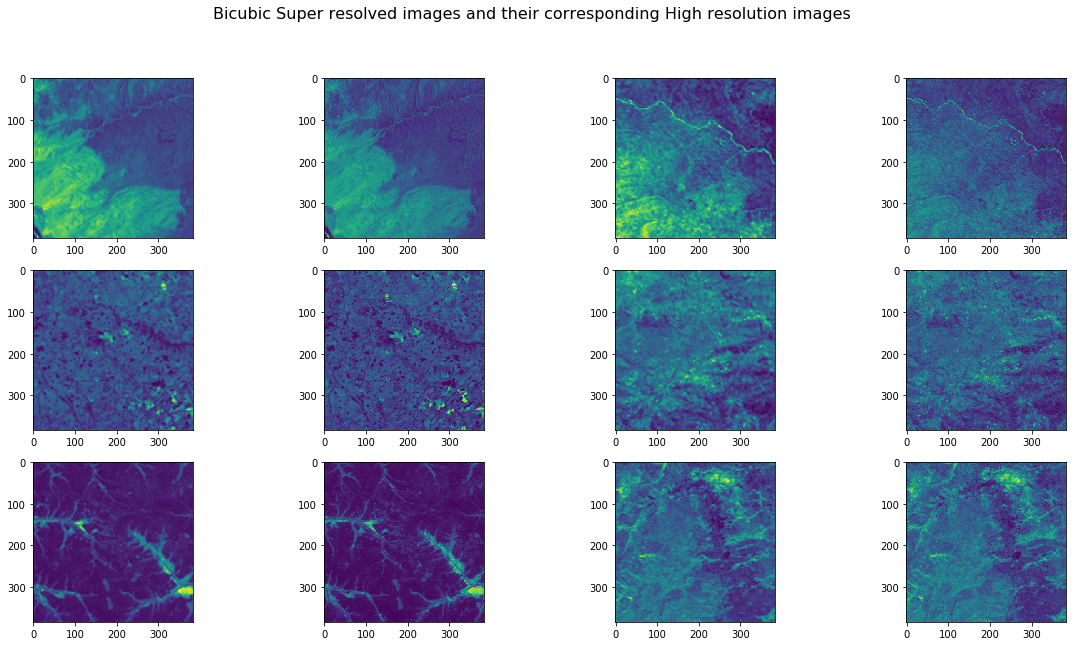

In [6]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Bicubic Super resolved images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(bicubic_upscaling_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(bicubic_upscaling_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

Scoring bicubic super resolved images against the High resolution images using **cPSNR metric** defined in the competition

In [7]:
scores = [score_image(i, s) for i,s in zip(bicubic_upscaling_images, train_scene_path)]

In [8]:
print(np.mean(scores))

1.0


## Super resolve images by taking median